<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/PCA_FEATURE_EXTRACTION/pinguinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Penguins

In [57]:
import pandas as pd
import seaborn as sn

df = sn.load_dataset('penguins')
df.head(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


# Explore species

In [58]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

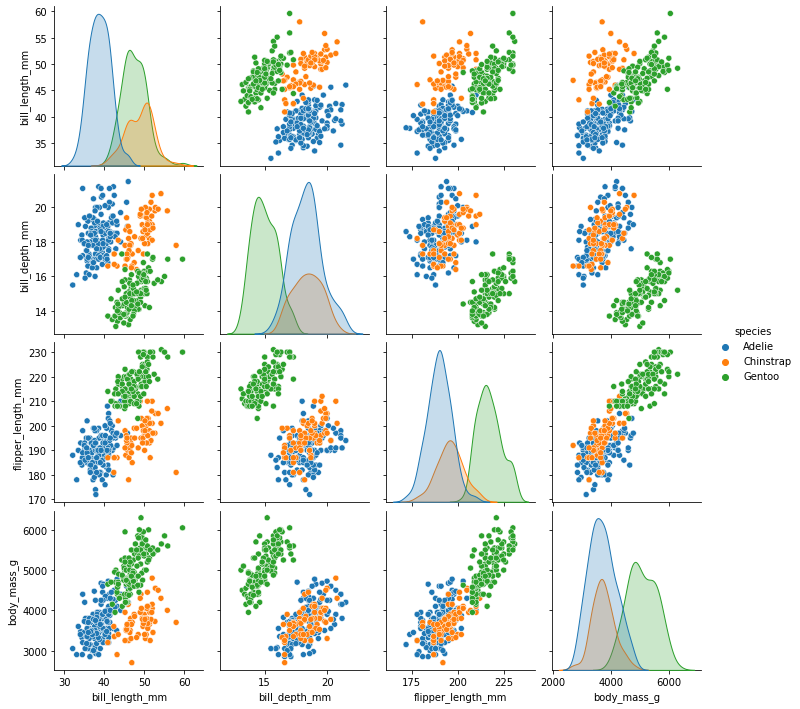

In [59]:
sn.pairplot(df,hue='species')

#Explore Island

In [60]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

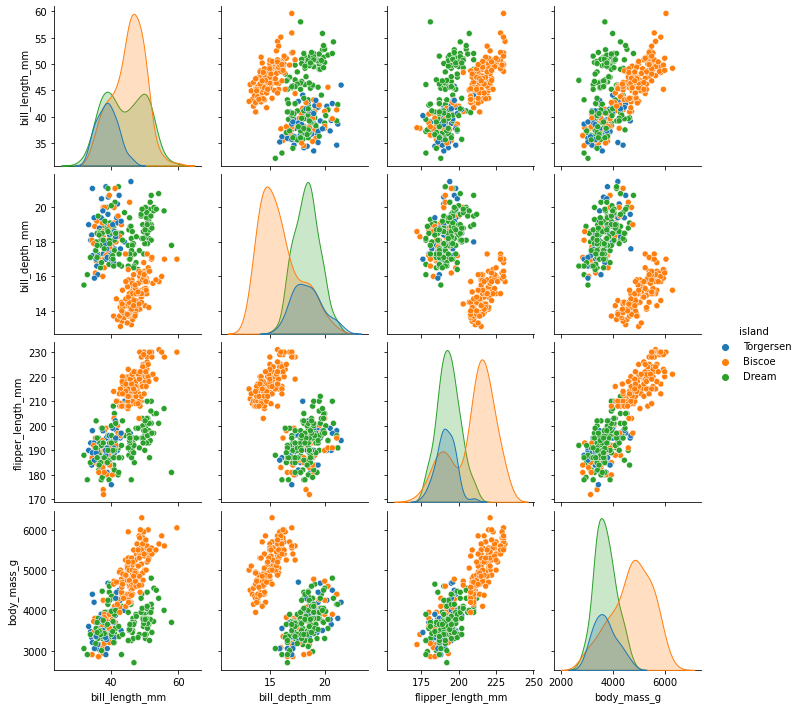

In [61]:
sn.pairplot(df,hue='island')

# Explore Sex

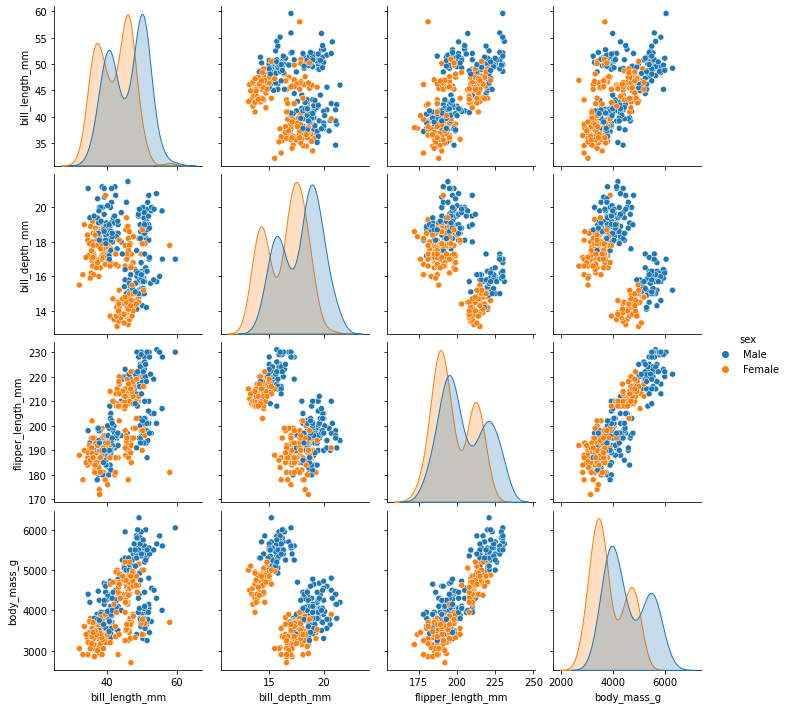

In [62]:
sn.pairplot(df,hue='sex')

 # Remove NaNs

In [63]:
df1 = df.dropna()
df1.shape

(333, 7)

In [64]:
df1.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


# Remove non-numerical (categorical) variables

In [65]:
df2 = df1.drop(['species','island','sex'],axis=1)
df2.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
6,38.9,17.8,181.0,3625.0
7,39.2,19.6,195.0,4675.0
12,41.1,17.6,182.0,3200.0
13,38.6,21.2,191.0,3800.0
14,34.6,21.1,198.0,4400.0


# PCA Projection

In [66]:
df2.shape

(333, 4)

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition


XS = StandardScaler().fit_transform(df2)
pca = decomposition.PCA(n_components=4).fit(XS)

XPCA = pca.transform(XS)

In [77]:
XPCA.shape

(333, 4)

In [80]:
df1.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


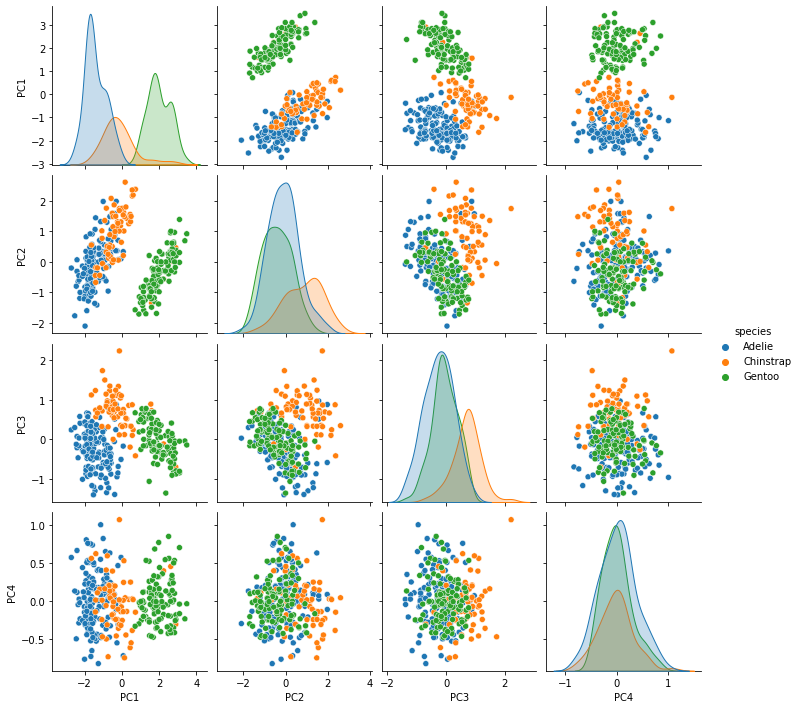

In [84]:
df_pca = pd.DataFrame(XPCA,columns=['PC1','PC2','PC3','PC4'])

y = df1['species'].values
df_pca['species'] = y
sn.pairplot(df_pca,hue='species')

In [86]:
df1.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


# PCA dimensionality reduction

In [87]:
100*pca.explained_variance_ratio_.cumsum()

array([ 68.63389314,  88.08682242,  97.30288541, 100.        ])

In [90]:
df_pca.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'species'], dtype='object')

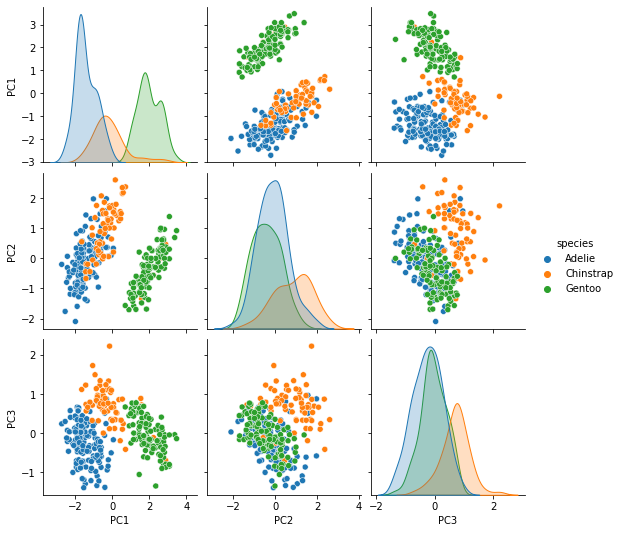

In [91]:
sn.pairplot(df_pca,vars=['PC1', 'PC2', 'PC3'],hue='species')

# Clustering

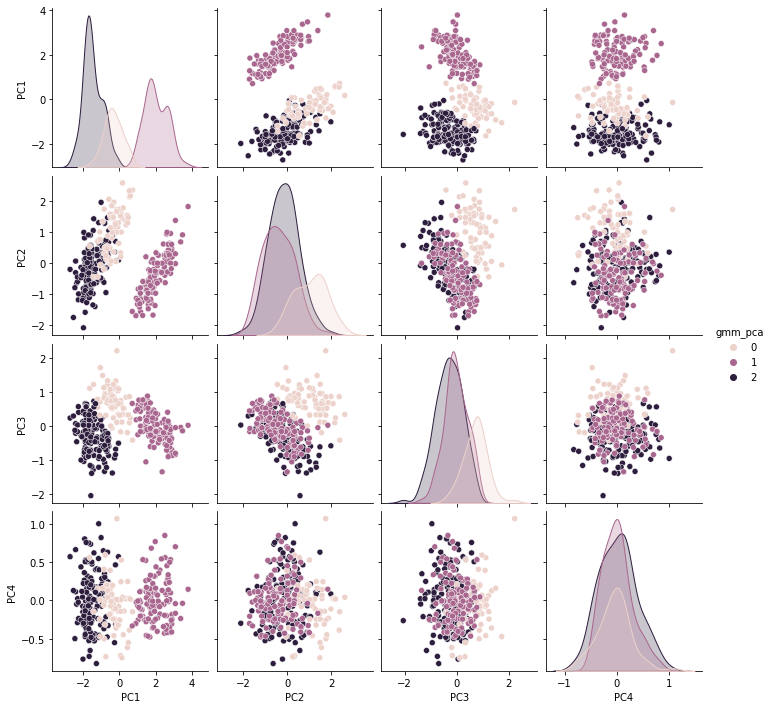

In [92]:
from sklearn import mixture
import matplotlib.pyplot as plt

clust_gmm_pca = mixture.GaussianMixture(n_components=3,covariance_type='full').fit_predict(XPCA)

df_pca['gmm_pca'] = clust_gmm_pca
sn.pairplot(df_pca,hue='gmm_pca')

In [93]:
from sklearn.metrics.cluster import adjusted_rand_score

y = df1['species'].copy()
ARI_pca = adjusted_rand_score(y,clust_gmm_pca)

print('ARI PCA = {}'.format(ARI_pca))

ARI PCA = 0.9589958965465829


# Feature Selection

Variables que mejor discriminan la especie

In [129]:
from sklearn.feature_selection import SelectKBest, chi2

y_species = df1['species'].copy()
sel_species= SelectKBest(chi2, k=1).fit(df2, y_species)

In [133]:
df2.shape

(333, 4)

In [134]:
y_species

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [130]:
sel_species.scores_

array([  159.4667058 ,    50.73067512,   251.41387352, 34511.11243421])

In [106]:
sel_species.get_support()

array([False, False, False,  True])

In [107]:
df2.columns[sel_species.get_support()==True]

Index(['body_mass_g'], dtype='object')

Variables que mejor discriminan la isla

In [113]:
from sklearn.feature_selection import SelectKBest, chi2

y_island = df1['island'].copy()
sel_island= SelectKBest(chi2, k=1).fit(df2, y_island)

In [114]:
sel_island.scores_

array([   32.21377186,    29.43894483,   117.73098515, 19904.81208504])

In [115]:
sel_island.get_support()

array([False, False, False,  True])

In [116]:
df2.columns[sel_island.get_support()==True]

Index(['body_mass_g'], dtype='object')

In [118]:
y_island.shape

(333,)

# Visualizacion t-SNE

In [154]:
from sklearn import manifold

# Apply t-SNE algorithm:
n_components = 2
perplexity = 45
tsne = manifold.TSNE(n_components=n_components, init='random', random_state=0, perplexity=perplexity)
pos = tsne.fit_transform(df2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


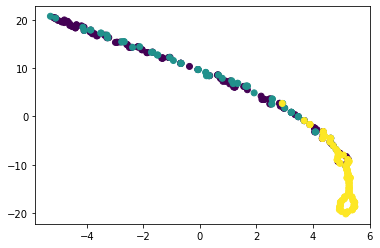

In [155]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df1['species'].unique())
y_species_num = le.transform(y_species)

plt.scatter(pos[:,0],pos[:,1],c=y_species_num)

In [150]:
y_species

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [149]:
y_species_num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

# Visualizacion MDS

In [152]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances

# Apply MDS algorithm:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=0,
                   dissimilarity="precomputed", n_jobs=1)
similarities = euclidean_distances(df2)
pos = mds.fit(similarities).embedding_

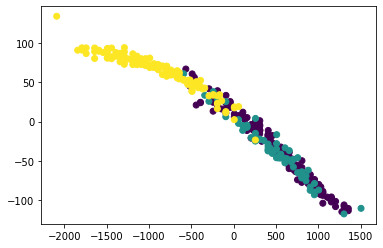

In [153]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df1['species'].unique())
y_species_num = le.transform(y_species)

plt.scatter(pos[:,0],pos[:,1],c=y_species_num)